In [17]:
import numpy as np
import pandas as pd
from protein_encoding import PC_6, read_fasta
from model_tools import split, show_train_history, metric_array
from model_edit_18 import train_model
from sklearn.utils import shuffle
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LeakyReLU

In [18]:
# set gpu
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [19]:
# load train data
# PC6 encoding
AVP_data = PC_6('../data/2024_pos_trainval_6db_2880.fasta', length=50)
non_AVP_data = PC_6('../data/combined_16995_negativeset.fasta', length=50)

In [20]:
# dict to np array
AVP_array= np.array(list(AVP_data.values()))
non_AVP_array = np.array(list(non_AVP_data.values()))

In [21]:
import random
non_AVP_array = random.sample(list(non_AVP_array), len(AVP_array))

In [22]:
# feature & labels (0:non_AVP, 1:AVP)
features = np.concatenate((non_AVP_array,AVP_array),axis=0)
labels = np.hstack((np.repeat(0, len(non_AVP_array)),np.repeat(1, len(AVP_array))))

In [23]:
# train validation split
train_data, val_data, train_labels, val_labels = split(features, labels , save = False, random_state = 1)

In [24]:
# shuffle
train_data, train_labels = shuffle(train_data, train_labels, random_state=0)
val_data, val_labels = shuffle(val_data, val_labels, random_state=0)

In [25]:
# model training
model, history = train_model(train_data,train_labels,val_data,val_labels,'edit18_PC_6_model_n', path='./')

Epoch 1/4000
69/70 [============================>.] - ETA: 0s - loss: 3.5634 - accuracy: 0.4955
Epoch 00001: val_loss improved from inf to 1.54357, saving model to ././edit18_PC_6_model_n_best_weights.h5
70/70 [==============================] - 8s 53ms/step - loss: 3.5568 - accuracy: 0.4951 - val_loss: 1.5436 - val_accuracy: 0.4665 - lr: 2.0000e-04
Epoch 2/4000
69/70 [============================>.] - ETA: 0s - loss: 2.6293 - accuracy: 0.5100
Epoch 00002: val_loss improved from 1.54357 to 1.52545, saving model to ././edit18_PC_6_model_n_best_weights.h5
70/70 [==============================] - 3s 42ms/step - loss: 2.6278 - accuracy: 0.5102 - val_loss: 1.5254 - val_accuracy: 0.5541 - lr: 2.0000e-04
Epoch 3/4000
69/70 [============================>.] - ETA: 0s - loss: 2.0459 - accuracy: 0.5690
Epoch 00003: val_loss improved from 1.52545 to 1.47325, saving model to ././edit18_PC_6_model_n_best_weights.h5
70/70 [==============================] - 3s 43ms/step - loss: 2.0437 - accuracy: 0.569

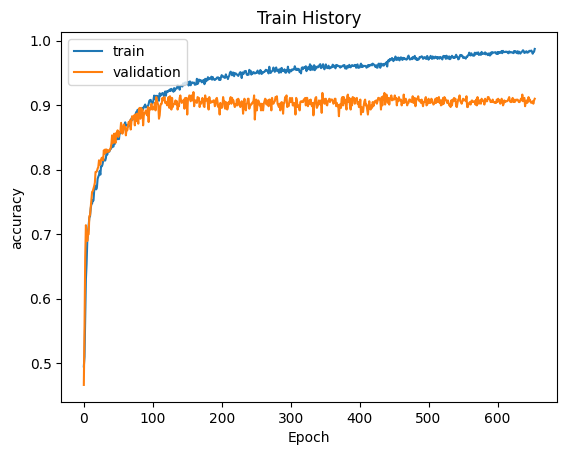

In [26]:
show_train_history(history ,'accuracy','val_accuracy')

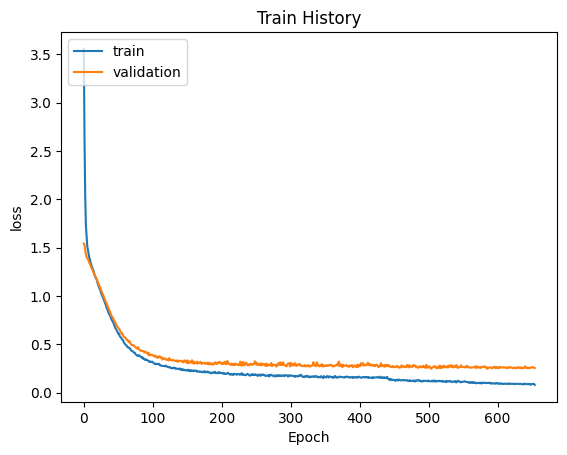

In [27]:
show_train_history(history ,'loss','val_loss')

In [28]:
# load best model
activation=tensorflow.keras.layers.LeakyReLU()
model = load_model('edit18_PC_6_model_n_best_weights.h5')

In [29]:
# validate
metric_array(val_data, val_labels, model)

{'accuracy': 0.9097938144329897,
 'precision': 0.9162303664921466,
 'sensitivity': 0.9020618556701031,
 'specificity': 0.9175257731958762,
 'f1': 0.9090909090909092,
 'mcc': 0.8196856415646934}

In [30]:
# load testing data
test_AVP_data = PC_6('../data/testing_6db_filter2012out_1_0.fasta', length=50)
test_non_AVP_data = PC_6('../data/neg_testing_uniprot_random_combined_293.fasta', length=50)
test_AVP_array= np.array(list(test_AVP_data.values()))
test_non_AVP_array = np.array(list(test_non_AVP_data.values()))

In [31]:
# feature & labels
test_features = np.concatenate((test_non_AVP_array,test_AVP_array),axis=0)
test_labels = np.hstack((np.repeat(0, len(test_non_AVP_array)),np.repeat(1, len(test_AVP_array))))

In [32]:
# testing
metric_array(test_features, test_labels, model)

{'accuracy': 0.8873720136518771,
 'precision': 0.8429003021148036,
 'sensitivity': 0.9522184300341296,
 'specificity': 0.8225255972696246,
 'f1': 0.8942307692307692,
 'mcc': 0.7813430798766071}